# Data Ingestion & Initial Inspection

In [1]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv("../data/heart.csv")
# Show first few rows
display(df.head(10))

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39.0,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,Female,46.0,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,Male,48.0,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,Female,61.0,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,Female,46.0,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,0.0
5,Female,43.0,2.0,No,0.0,No,No,Yes,No,228.0,180.0,110.0,30.30,77.0,99.0,0.0
6,Female,63.0,1.0,No,0.0,No,No,No,No,205.0,138.0,71.0,33.11,60.0,85.0,1.0
7,Female,45.0,2.0,Yes,20.0,No,No,No,No,313.0,100.0,71.0,21.68,79.0,78.0,0.0
8,Male,52.0,1.0,No,0.0,No,No,Yes,No,260.0,141.5,89.0,26.36,76.0,79.0,0.0
9,Male,43.0,1.0,Yes,30.0,No,No,Yes,No,225.0,162.0,107.0,23.61,93.0,88.0,0.0


In [2]:
# Shape (rows, columns)
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Data types and non-null counts
print(df.info())

# Quick statistical summary (numeric only)
print(df.describe().T)

Shape: (11000, 16)
Columns: ['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           10944 non-null  object 
 1   age              10925 non-null  float64
 2   education        11000 non-null  float64
 3   currentSmoker    11000 non-null  object 
 4   cigsPerDay       10954 non-null  float64
 5   BPMeds           11000 non-null  object 
 6   prevalentStroke  11000 non-null  object 
 7   prevalentHyp     10871 non-null  object 
 8   diabetes         10783 non-null  object 
 9   totChol          10960 non-null  float64
 10  sysBP            11000 non-null  float64
 11  diaBP            10588 non-null  float64
 12  BMI              1093

In [3]:
# Count missing values per column
print(df.isnull().sum())

# Percentage missing
print((df.isnull().sum() / len(df)) * 100)

# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

gender              56
age                 75
education            0
currentSmoker        0
cigsPerDay          46
BPMeds               0
prevalentStroke      0
prevalentHyp       129
diabetes           217
totChol             40
sysBP                0
diaBP              412
BMI                 65
heartRate           48
glucose              0
TenYearCHD         361
dtype: int64
gender             0.509091
age                0.681818
education          0.000000
currentSmoker      0.000000
cigsPerDay         0.418182
BPMeds             0.000000
prevalentStroke    0.000000
prevalentHyp       1.172727
diabetes           1.972727
totChol            0.363636
sysBP              0.000000
diaBP              3.745455
BMI                0.590909
heartRate          0.436364
glucose            0.000000
TenYearCHD         3.281818
dtype: float64
Duplicate rows: 0


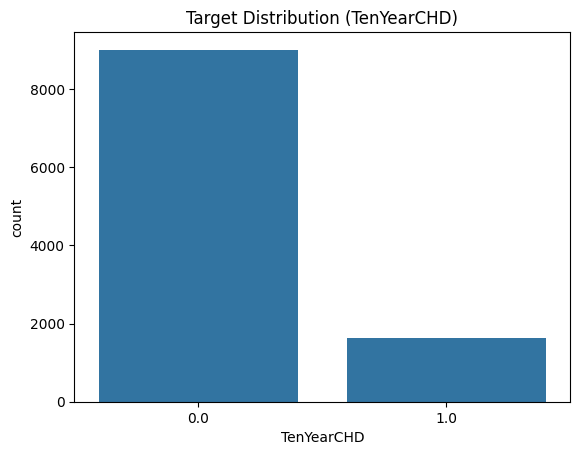

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="TenYearCHD", data=df)
plt.title("Target Distribution (TenYearCHD)")
plt.show()

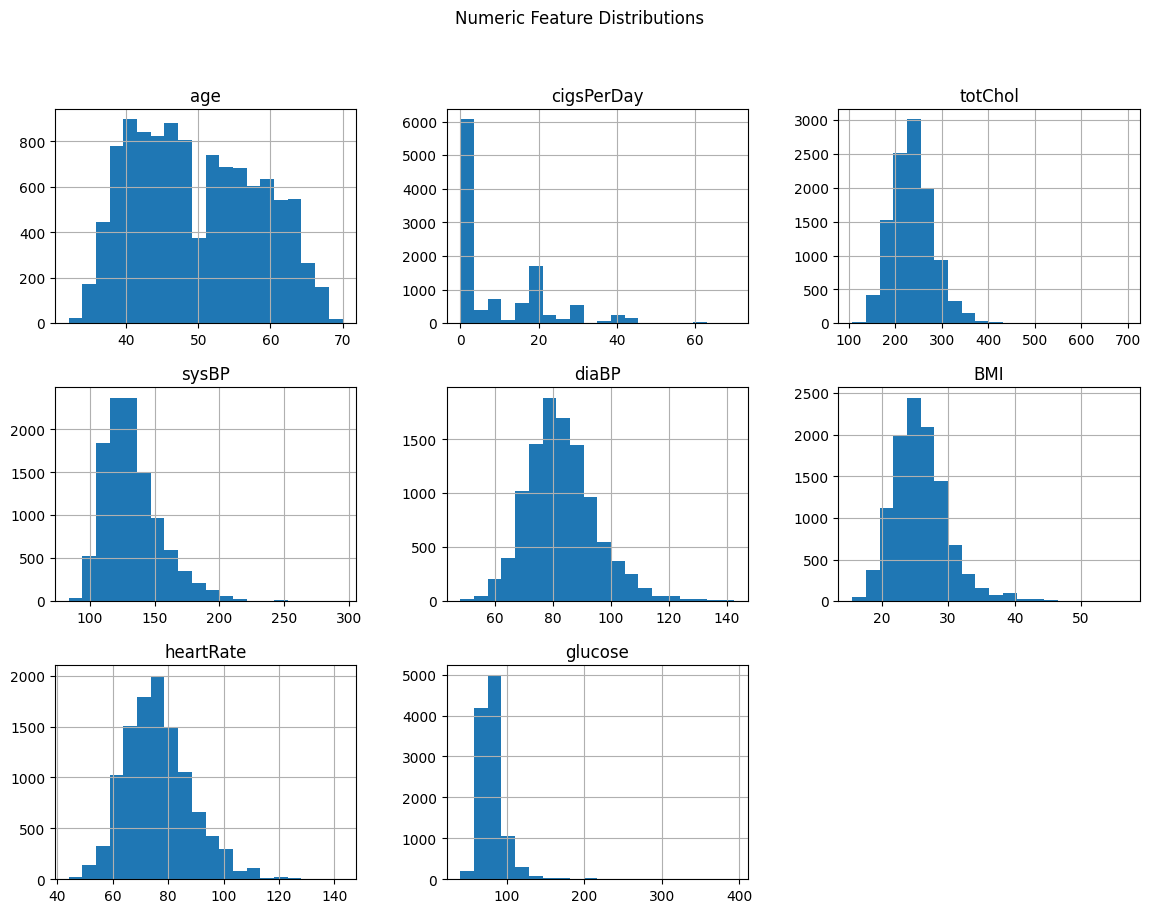

In [5]:
numeric_cols = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

df[numeric_cols].hist(figsize=(14,10), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()

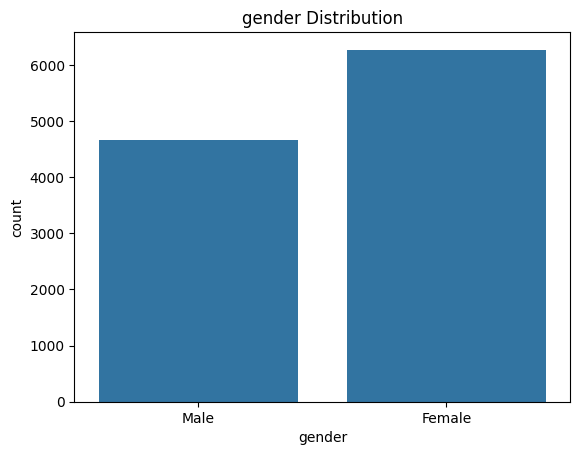

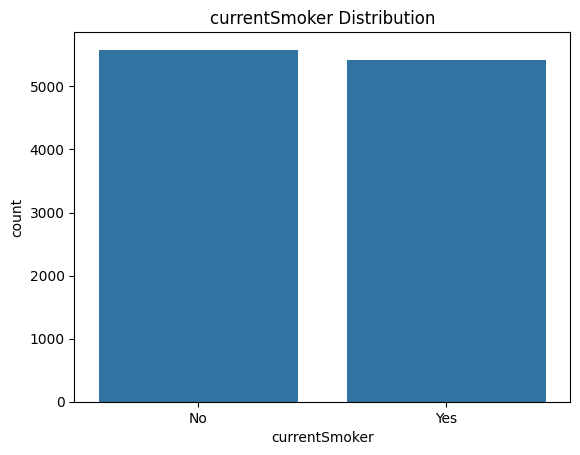

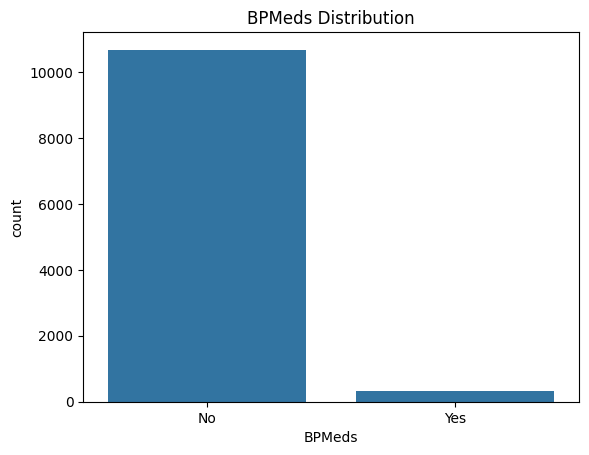

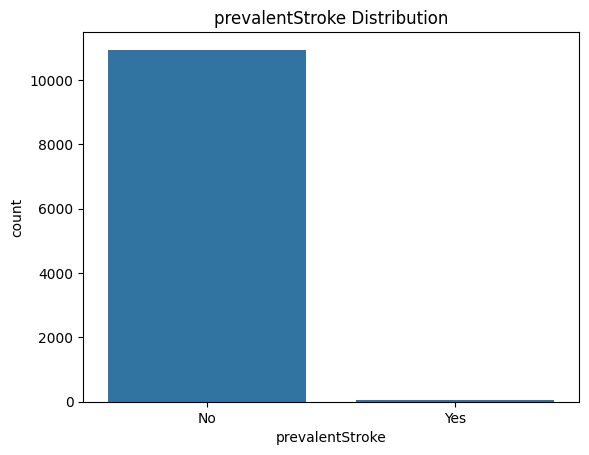

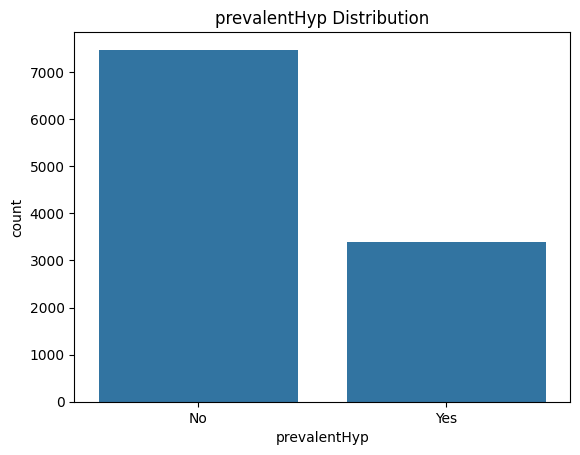

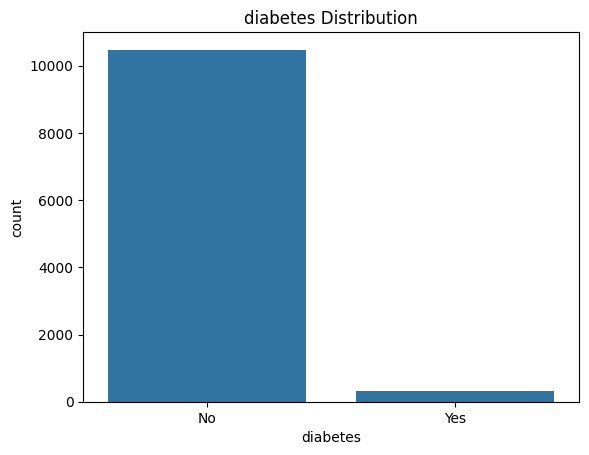

In [6]:
categorical_cols = ['gender','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.show()

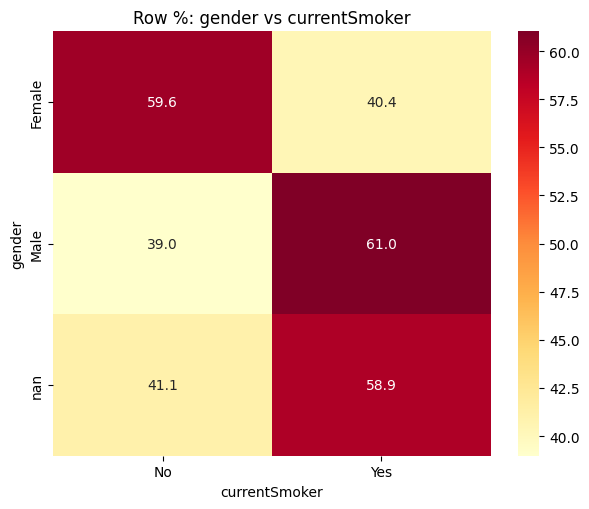

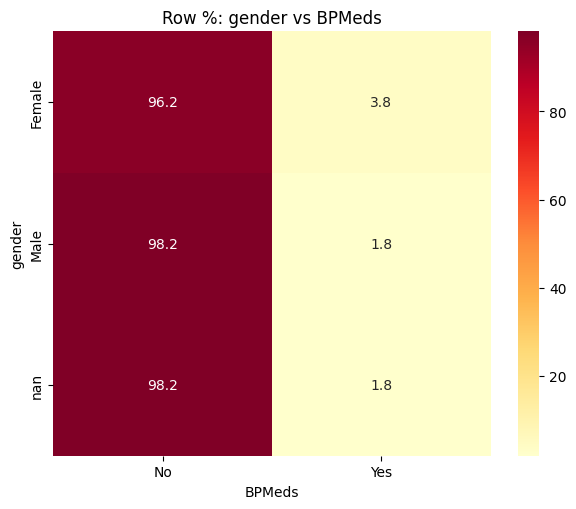

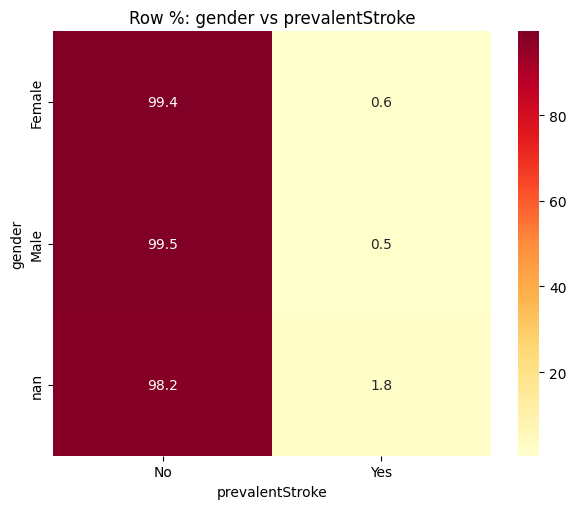

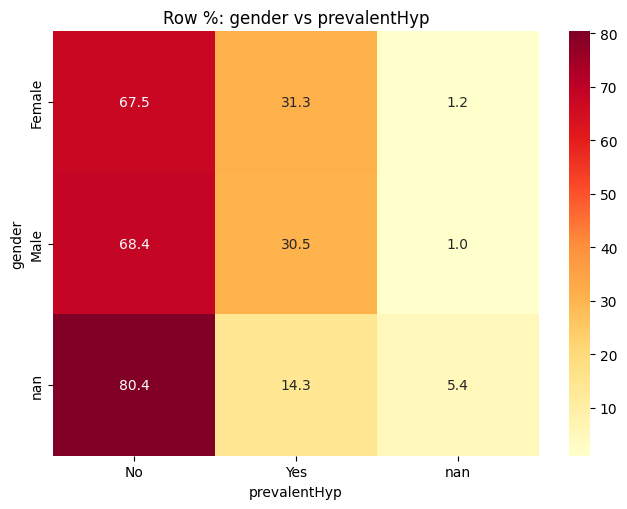

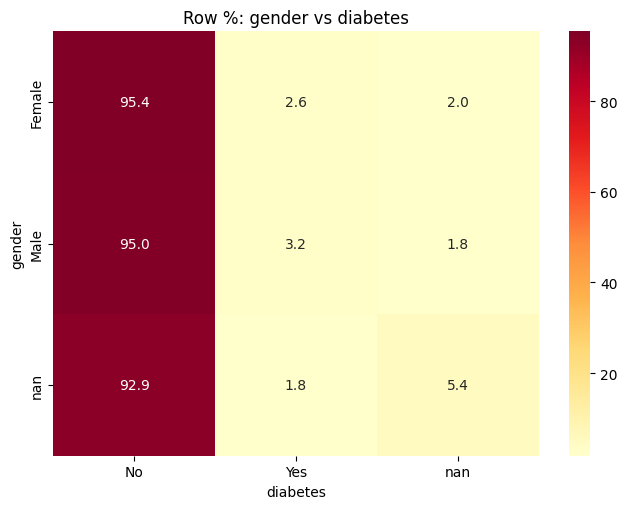

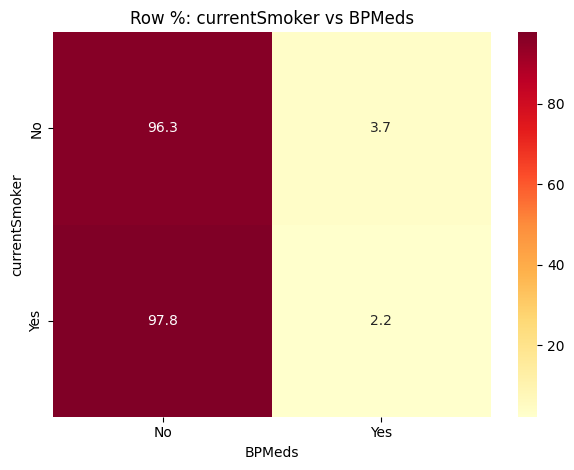

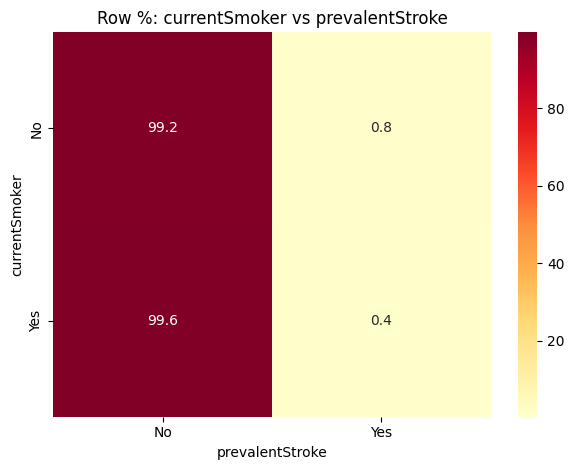

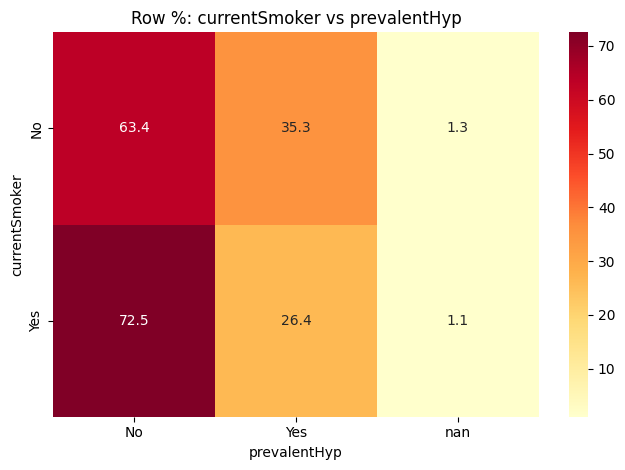

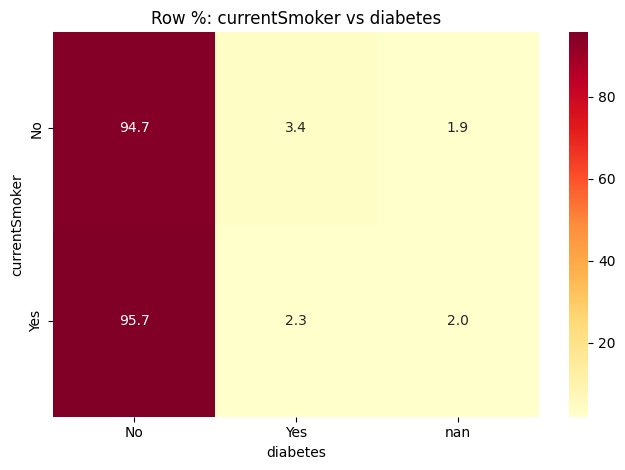

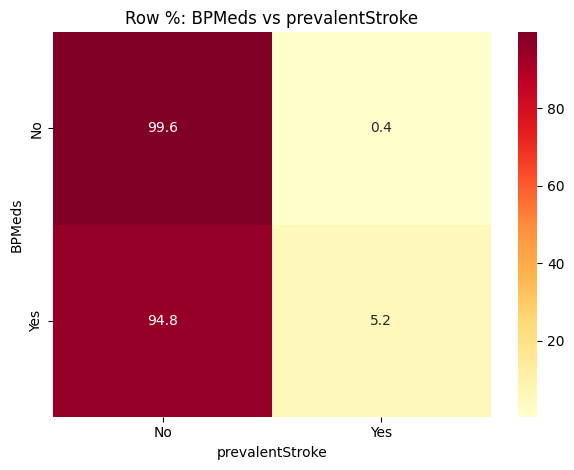

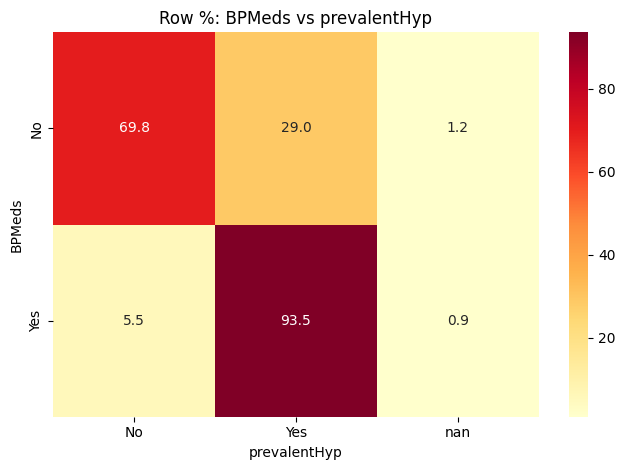

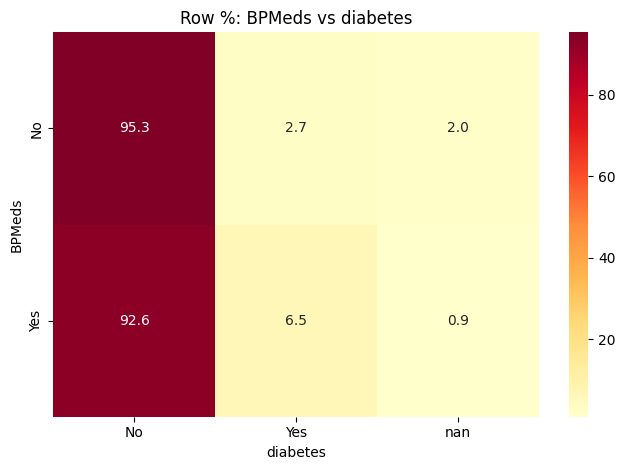

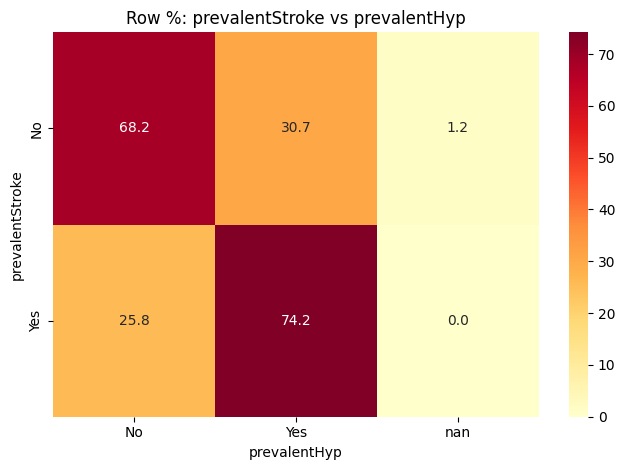

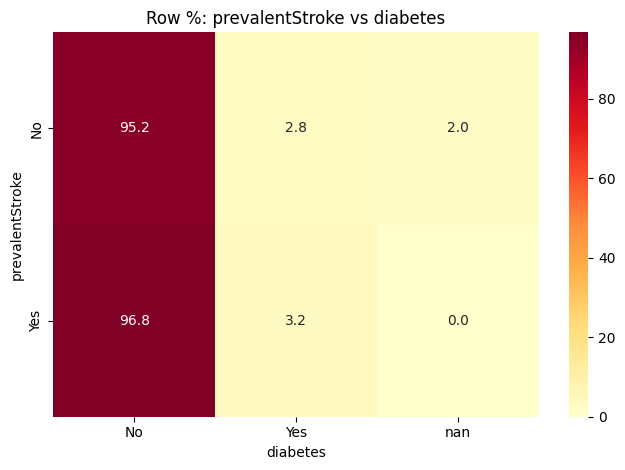

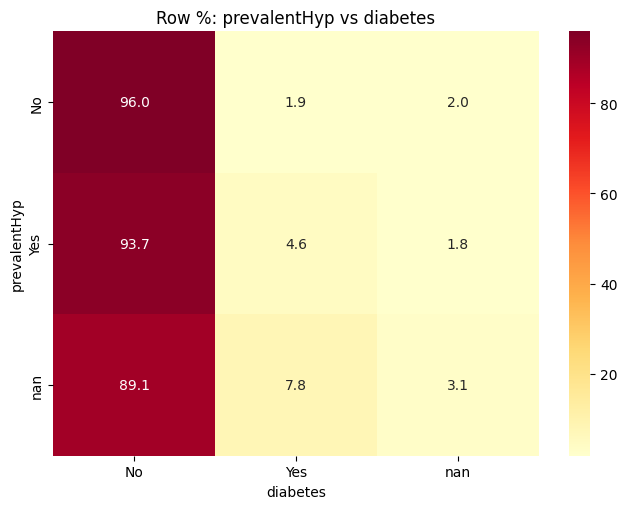

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Use the same categorical_cols as above
cat_cols = ['gender','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

#  Row-normalized percentage heatmaps
for a, b in combinations(cat_cols, 2):
    ct = pd.crosstab(df[a], df[b], normalize='index', dropna=False) * 100
    plt.figure(figsize=(5 + 0.6*ct.shape[1], 4 + 0.4*ct.shape[0]))
    sns.heatmap(ct, annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title(f"Row %: {a} vs {b}")
    plt.xlabel(b)
    plt.ylabel(a)
    plt.tight_layout()
    plt.show()

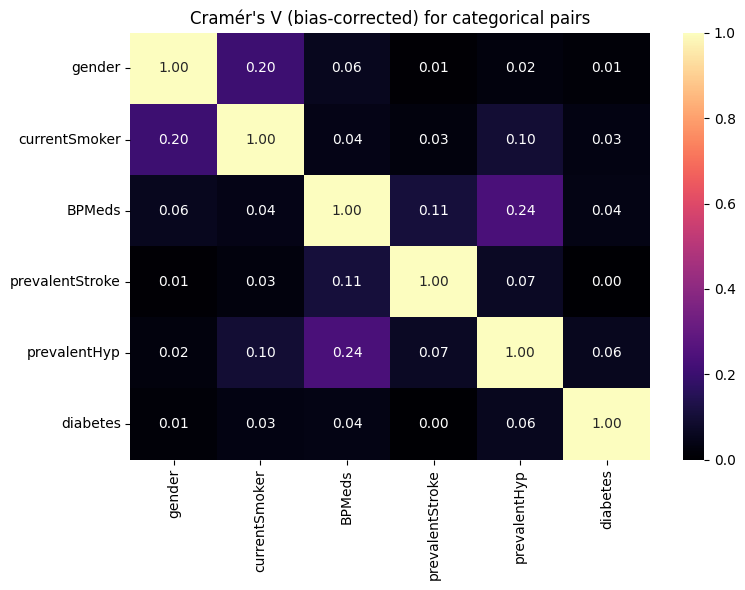

{'high_association_pairs': []}


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Prefer previously defined categorical_cols; fall back to cat_cols list above
try:
    cat_cols = categorical_cols  # from earlier cell
except NameError:
    cat_cols = ['gender','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

# Ensure categories are treated as strings (avoid mixed types/booleans)
df_cat = df[cat_cols].copy()
for c in df_cat.columns:
    df_cat[c] = df_cat[c].astype(str)

n = len(cat_cols)
cramers = pd.DataFrame(np.ones((n, n)), index=cat_cols, columns=cat_cols)

for i, a in enumerate(cat_cols):
    for j, b in enumerate(cat_cols):
        if j <= i:
            continue  # will mirror later
        # Build contingency table (exclude NaNs)
        ct = pd.crosstab(df_cat[a], df_cat[b])
        if ct.size == 0:
            v = np.nan
        else:
            chi2, p, dof, expected = chi2_contingency(ct, correction=False)
            n_obs = ct.to_numpy().sum()
            phi2 = chi2 / max(n_obs, 1)
            r, k = ct.shape
            # Bias-corrected Cramér's V (Bergsma, 2013)
            phi2corr = max(0, phi2 - (k-1)*(r-1)/(max(n_obs-1, 1)))
            rcorr = r - (r-1)**2 / max(n_obs-1, 1)
            kcorr = k - (k-1)**2 / max(n_obs-1, 1)
            denom = max(min(kcorr-1, rcorr-1), 1e-12)
            v = np.sqrt(phi2corr / denom)
        cramers.loc[a, b] = v
        cramers.loc[b, a] = v

plt.figure(figsize=(8, 6))
sns.heatmap(cramers, annot=True, fmt='.2f', cmap='magma', vmin=0, vmax=1)
plt.title("Cramér's V (bias-corrected) for categorical pairs")
plt.tight_layout()
plt.show()

threshold = 0.8
high_pairs = []
for i in range(n):
    for j in range(i+1, n):
        v = cramers.iat[i, j]
        if pd.notna(v) and v >= threshold:
            high_pairs.append((cat_cols[i], cat_cols[j], float(v)))
print({"high_association_pairs": high_pairs})

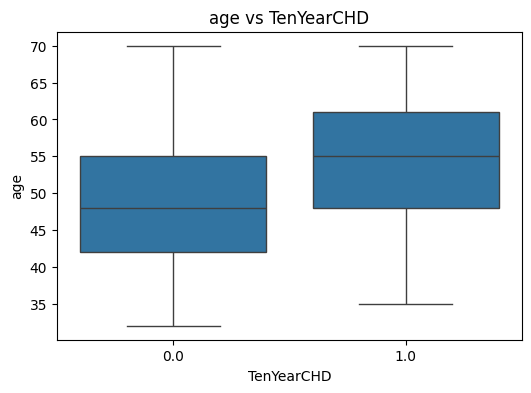

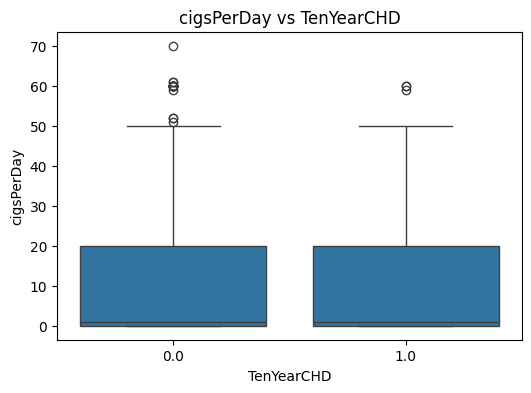

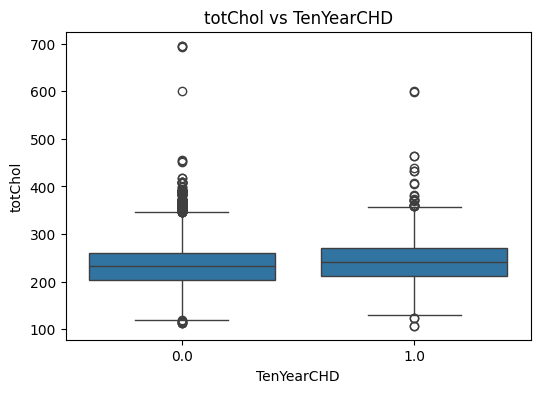

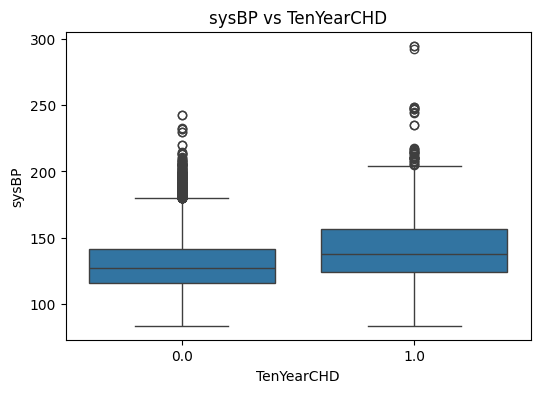

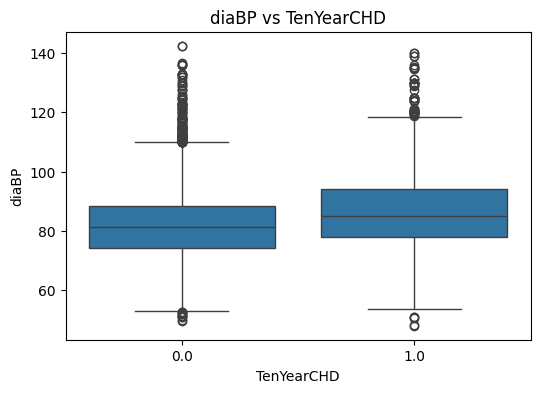

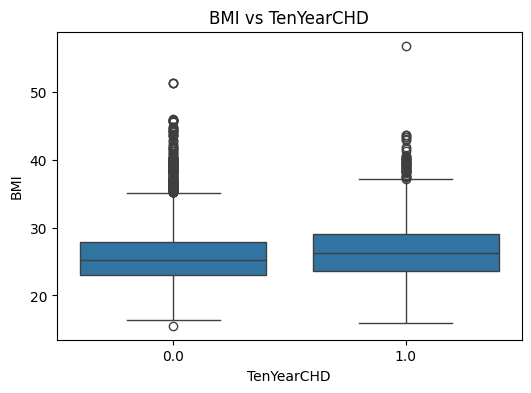

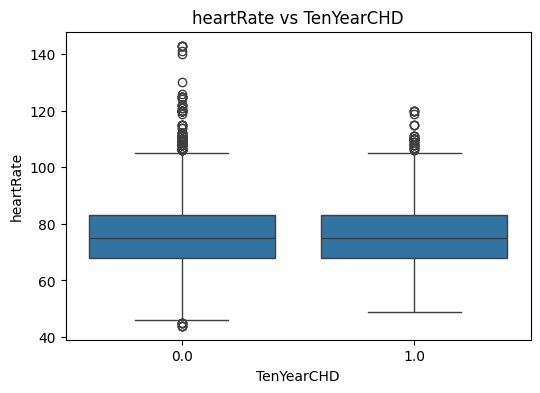

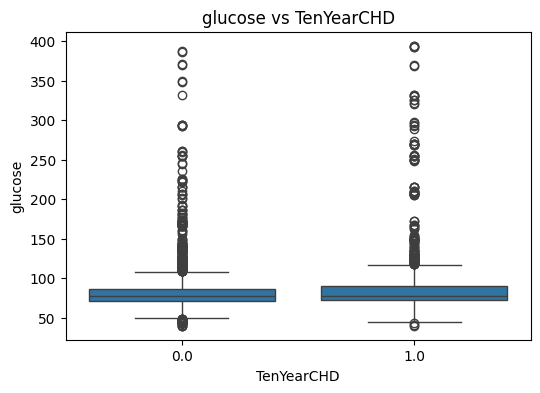

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="TenYearCHD", y=col, data=df)
    plt.title(f"{col} vs TenYearCHD")
    plt.show()

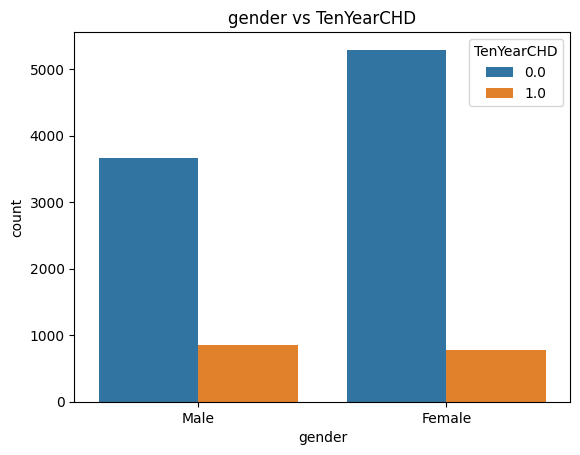

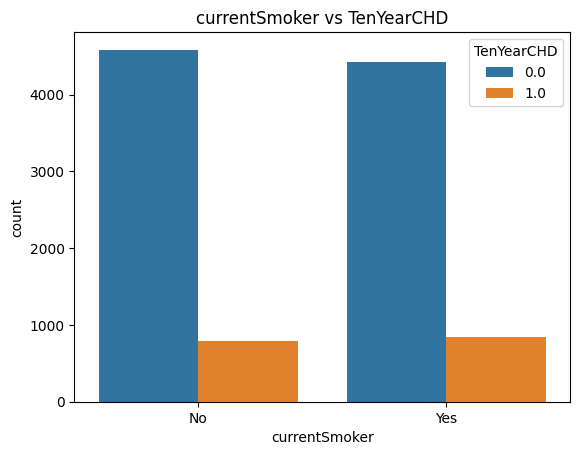

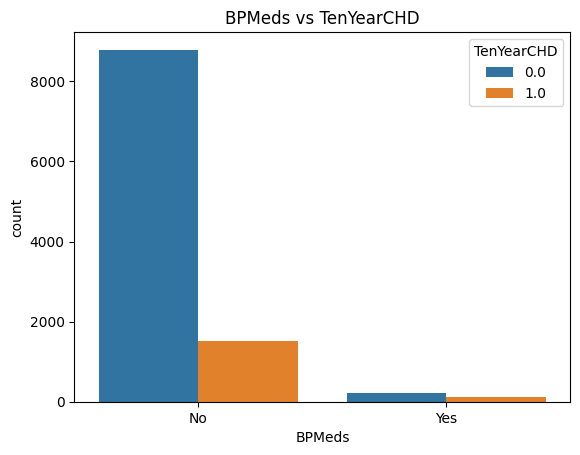

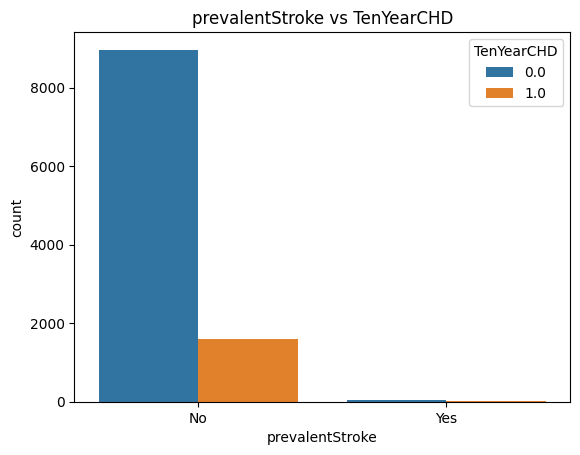

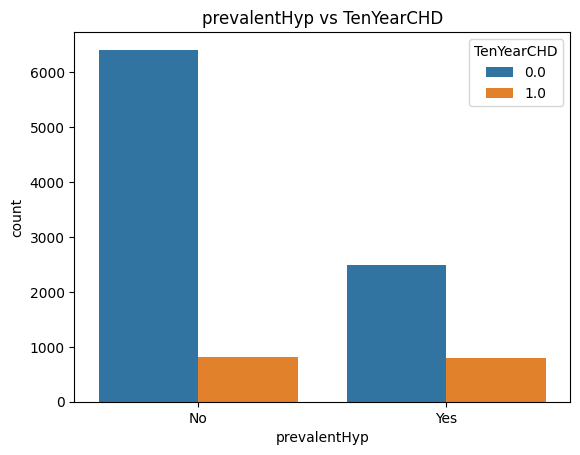

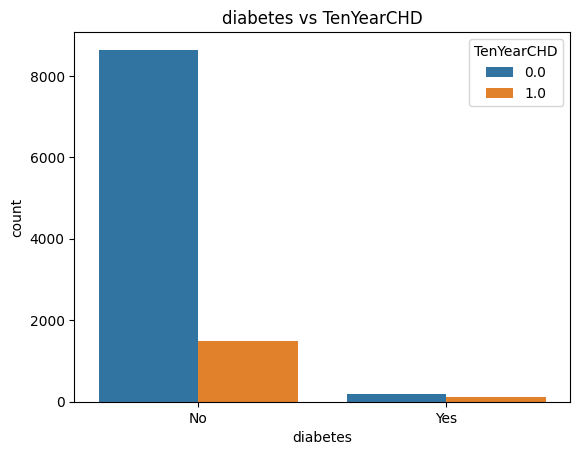

In [10]:
for col in categorical_cols:
    sns.countplot(x=col, hue="TenYearCHD", data=df)
    plt.title(f"{col} vs TenYearCHD")
    plt.show()

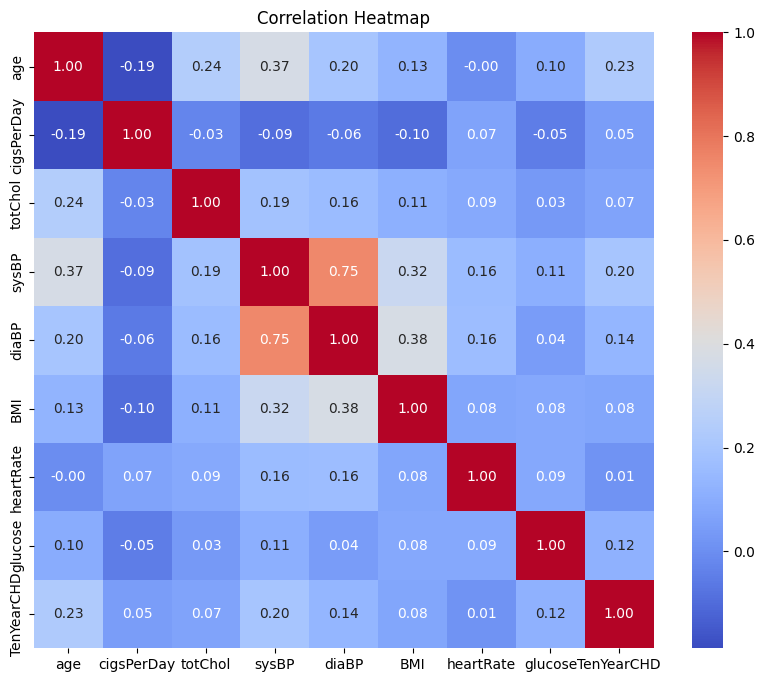

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols + ['TenYearCHD']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

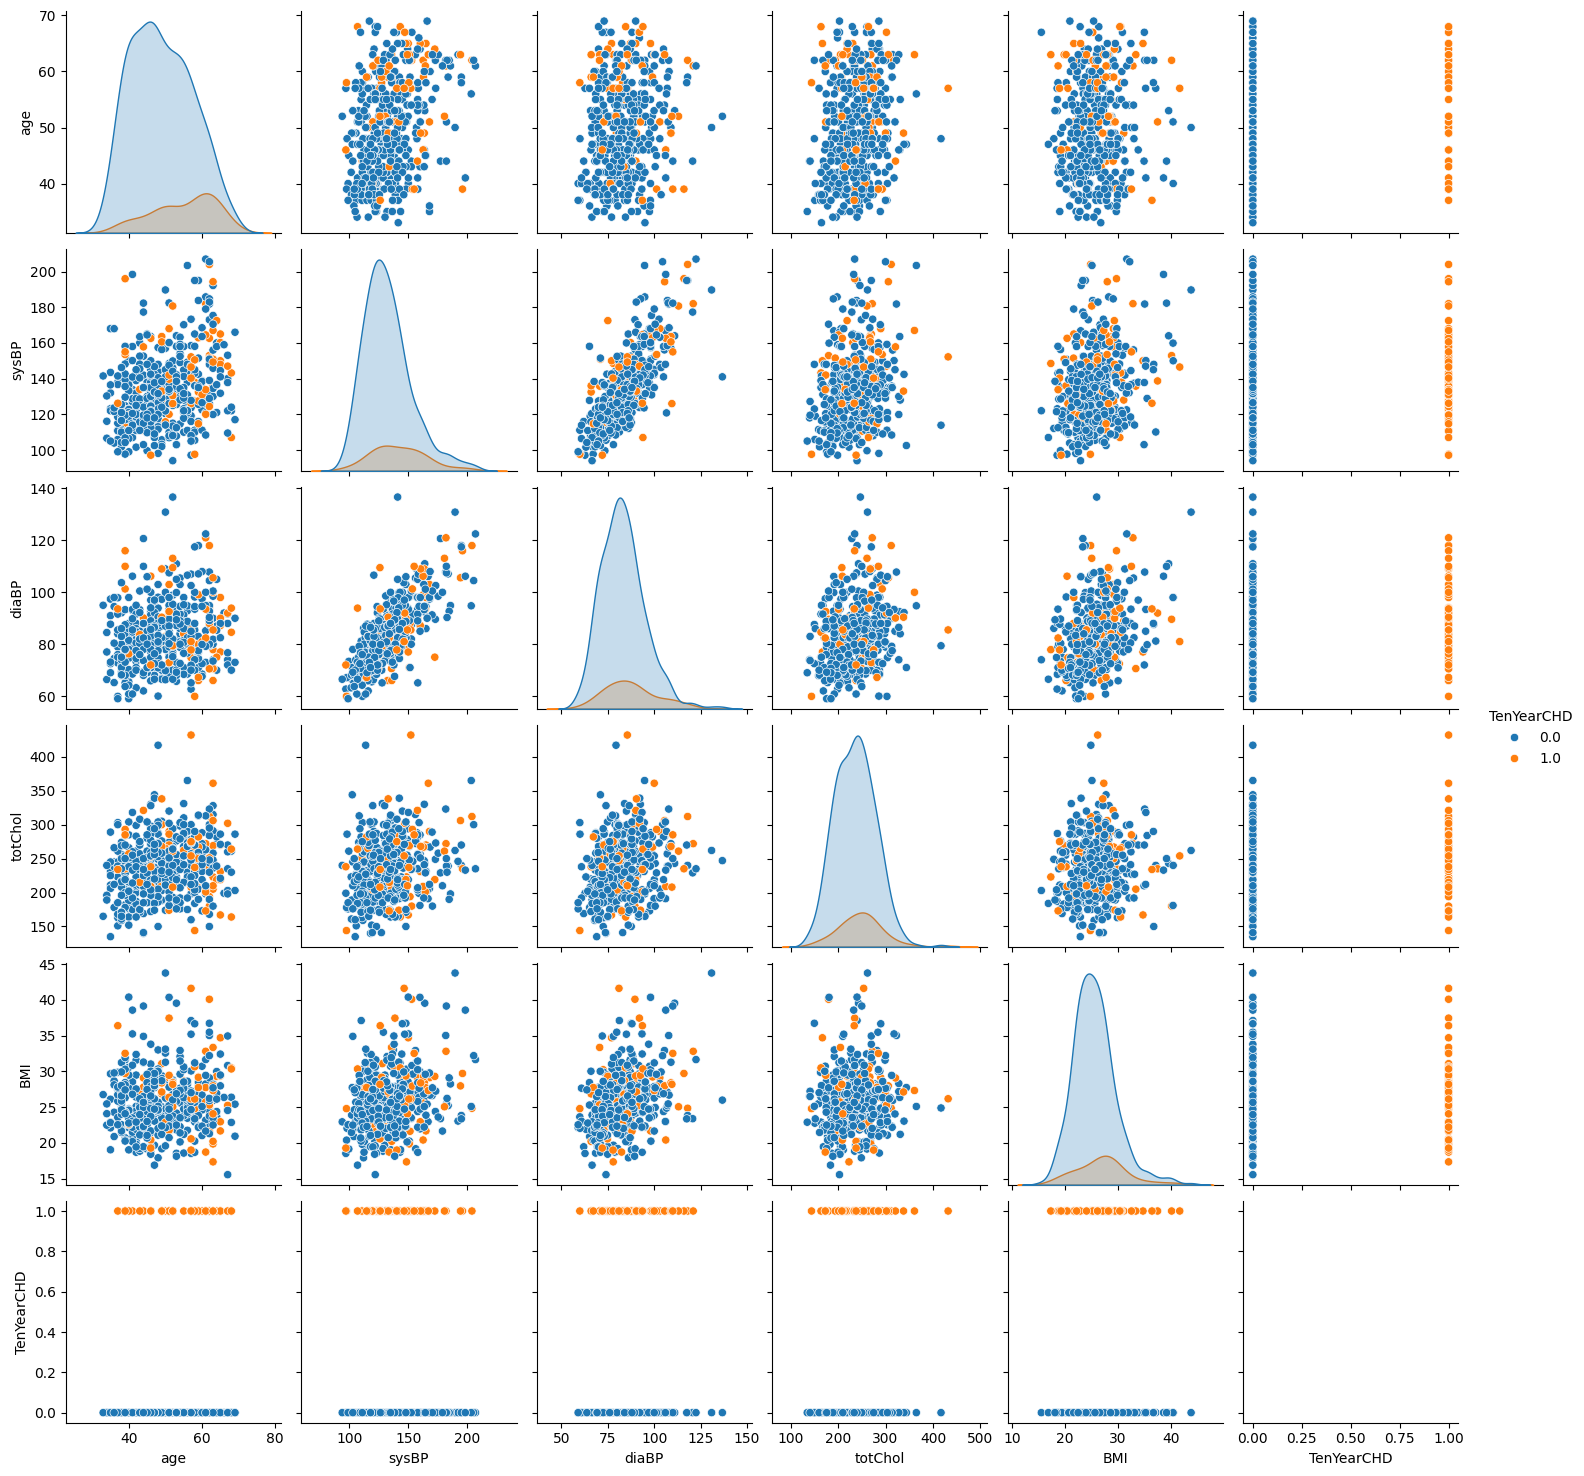

In [12]:
import seaborn as sns

subset = ['age','sysBP','diaBP','totChol','BMI','TenYearCHD']
sns.pairplot(df.sample(500), vars=subset, hue="TenYearCHD")

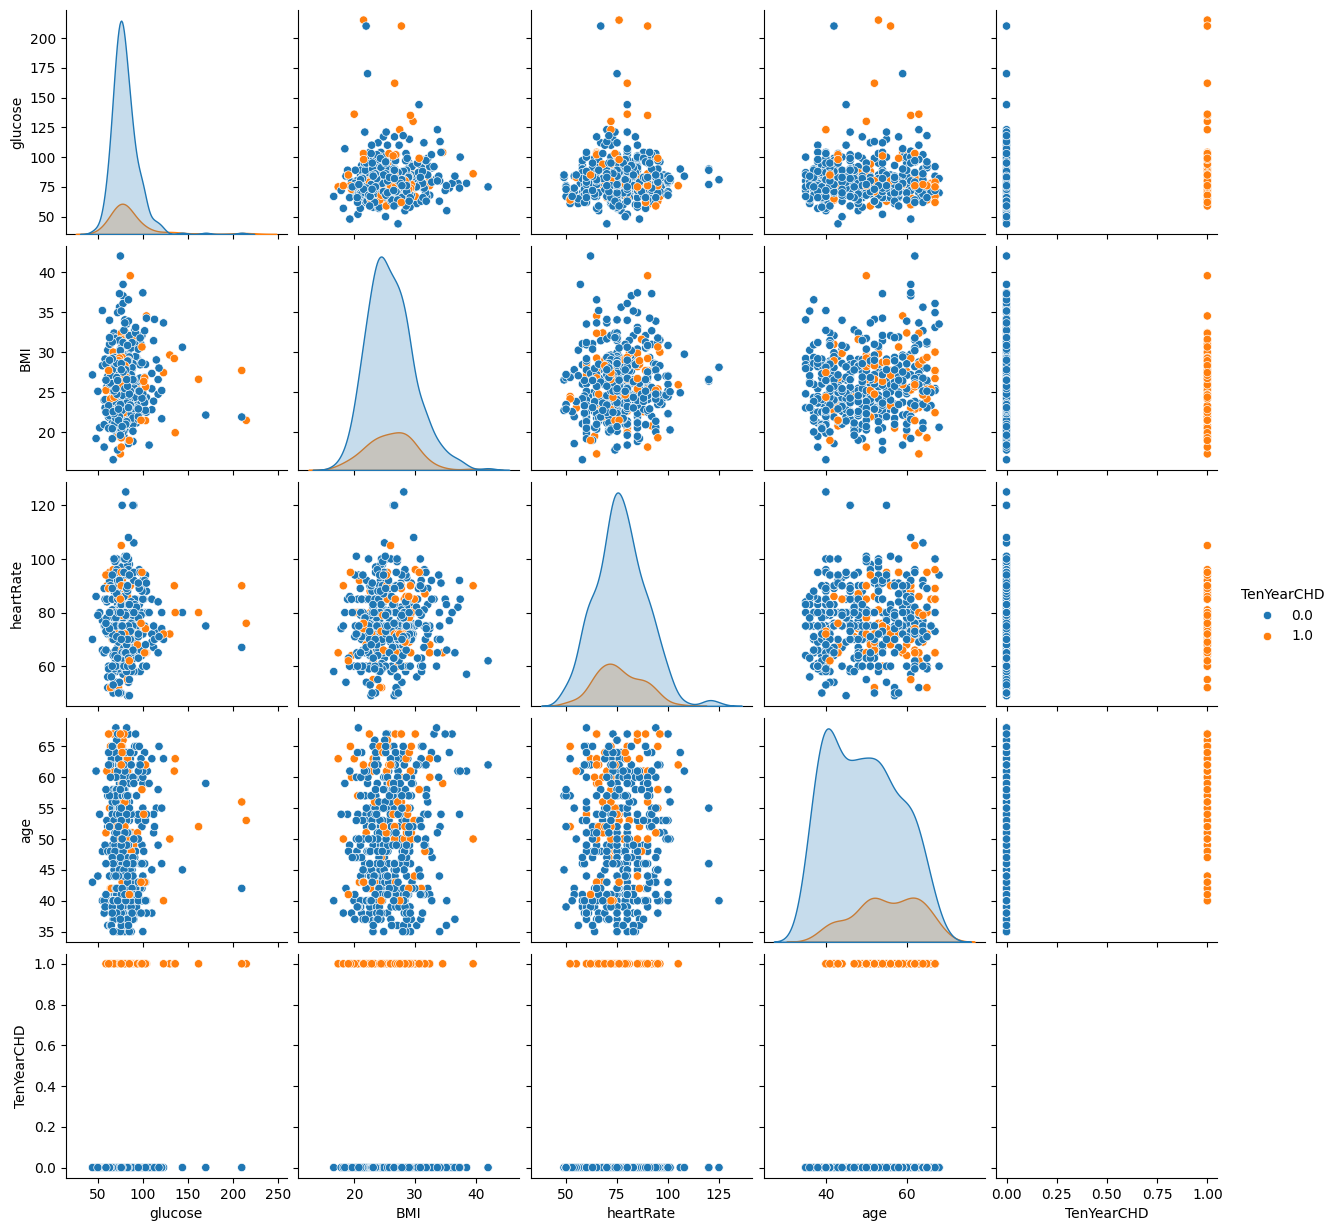

In [13]:
subset = ['glucose','BMI','heartRate','age','TenYearCHD']
sns.pairplot(df.sample(500), vars=subset, hue="TenYearCHD")

/var/folders/78/1x37jfss4rx38yjhktq5fgx00000gn/T/ipykernel_72680/290266592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="education", data=df, palette="Set2")


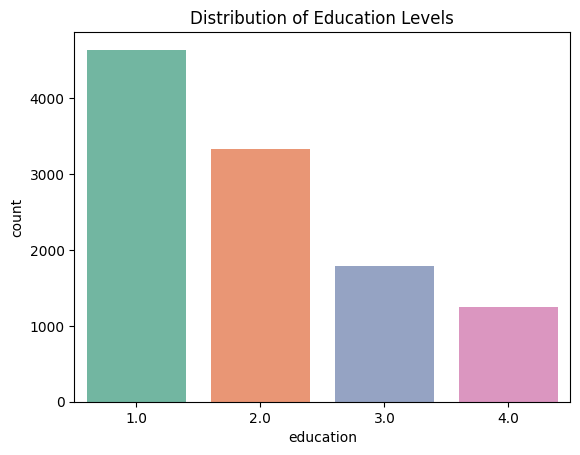

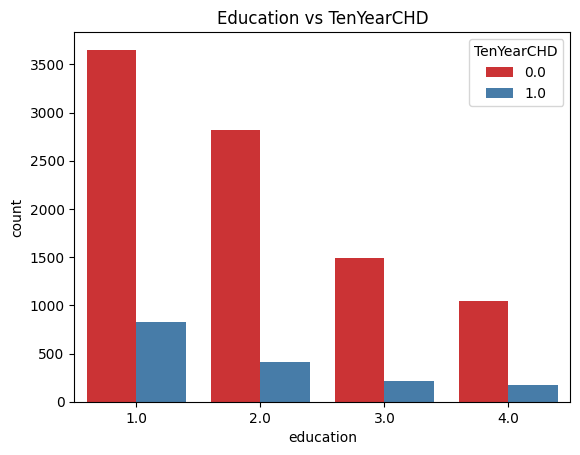

CHD rate by education level:
 education
1.0    0.184821
2.0    0.128395
3.0    0.128145
4.0    0.140496
Name: TenYearCHD, dtype: float64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of education levels
sns.countplot(x="education", data=df, palette="Set2")
plt.title("Distribution of Education Levels")
plt.show()

# Education vs Heart Disease outcome
sns.countplot(x="education", hue="TenYearCHD", data=df, palette="Set1")
plt.title("Education vs TenYearCHD")
plt.show()

# Optionally: average CHD rate per education group
edu_chd = df.groupby("education")["TenYearCHD"].mean()
print("CHD rate by education level:\n", edu_chd)

# Preprocessing

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_step = df.copy()

# --- Ensure pulsePressure exists and is consistent ---
if "pulsePressure" not in df_step.columns:
    if {"sysBP","diaBP"}.issubset(df_step.columns):
        df_step["pulsePressure"] = df_step["sysBP"] - df_step["diaBP"]
    else:
        raise ValueError("Need sysBP and diaBP to create pulsePressure.")

# Fix impossible pulse pressures (clip negatives)
df_step["pulsePressure"] = df_step["pulsePressure"].clip(lower=0)

# --- Choose which columns to drop ---
to_drop = []
if "diaBP" in df_step.columns:      # drop redundant BP
    to_drop.append("diaBP")
if "education" in df_step.columns:  # drop education
    to_drop.append("education")

df_step = df_step.drop(columns=to_drop)
print("Dropped columns (redundancy/unwanted):", to_drop)

# --- Check collinearity (VIF) ---
vif_features = ["age","sysBP","pulsePressure","BMI","totChol","glucose","heartRate","cigsPerDay"]
existing = [c for c in vif_features if c in df_step.columns]
X_vif = add_constant(df_step[existing].dropna())
vif_table = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
}).sort_values("VIF", ascending=False)

print("\nVIF after dropping diaBP + education:")
print(vif_table.to_string(index=False))

# --- Show final column list ---
print("\nColumns kept (post-redundancy step):")
print(df_step.columns.tolist())
print("Shape now:", df_step.shape)

Dropped columns (redundancy/unwanted): ['diaBP', 'education']

VIF after dropping diaBP + education:
      feature        VIF
        const 127.432383
        sysBP   4.371927
pulsePressure   4.021398
          age   1.271637
          BMI   1.186293
      totChol   1.090233
    heartRate   1.053975
   cigsPerDay   1.048098
      glucose   1.029404

Columns kept (post-redundancy step):
['gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulsePressure']
Shape now: (11000, 15)


In [ ]:
# --- Core imports ---
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


assert "pulsePressure" in df_step.columns, "pulsePressure missing. Create it before these cells."
assert "TenYearCHD" in df_step.columns, "Target column TenYearCHD missing."

# 1) Drop rows with missing target (this is safe and required)
df_core = df_step.dropna(subset=["TenYearCHD"]).copy()

# 2) Define X / y
target = "TenYearCHD"
X_full = df_core.drop(columns=[target])
y_full = df_core[target].astype(int)

# 3) Identify column types from X_full (do NOT impute here)
cat_cols = X_full.select_dtypes(include=["object","category","bool"]).columns.tolist()
num_cols = X_full.columns.difference(cat_cols).tolist()

print("Categorical:", cat_cols)
print("Numeric:", num_cols)

# 4) Stratified split BEFORE any learned preprocessing (prevents leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.20, stratify=y_full, random_state=42
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Train positive rate:", y_train.mean(), " Test positive rate:", y_test.mean())

Categorical: ['gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
Numeric: ['BMI', 'age', 'cigsPerDay', 'glucose', 'heartRate', 'pulsePressure', 'sysBP', 'totChol']
Train shape: (8511, 14)  Test shape: (2128, 14)
Train positive rate: 0.1534484784396663  Test positive rate: 0.1536654135338346


In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

CAPS = {
    "totChol": (100, 400),
    "glucose": (40, 250),
    "pulsePressure": (0, 120),
    "sysBP": (80, 250),
    "BMI": (15, 45)
}

class ClipCaps(BaseEstimator, TransformerMixin):
    """Clip specified numeric columns to (low, high) bounds."""
    def __init__(self, caps: dict, cols: list):
        self.caps = caps
        self.cols = cols

    def fit(self, X, y=None):
        return self  # stateless

    def transform(self, X):
        X = X.copy()
        for col, (low, high) in self.caps.items():
            if col in self.cols:
                X[col] = X[col].clip(lower=low, upper=high)
        return X

    # NEW: let ColumnTransformer/Pipeline propagate feature names
    def get_feature_names_out(self, input_features=None):
        # Return the same names we received (this transformer doesn't change columns)
        if input_features is None:
            return np.asarray(self.cols, dtype=object)
        return np.asarray(input_features, dtype=object)

In [25]:
for df_part in [X_train, X_test]:
    for col, (low, high) in CAPS.items():
        if col in df_part.columns:
            df_part[col] = df_part[col].clip(lower=low, upper=high)

# 3. Build pipeline WITHOUT ClipCaps
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

preprocessor.fit(X_train)

X_train_pre = preprocessor.transform(X_train)
X_test_pre  = preprocessor.transform(X_test)

feat_names = preprocessor.get_feature_names_out()
print("OK. n_features:", len(feat_names))
print(feat_names.tolist())

OK. n_features: 14
['num__BMI', 'num__age', 'num__cigsPerDay', 'num__glucose', 'num__heartRate', 'num__pulsePressure', 'num__sysBP', 'num__totChol', 'cat__gender_Male', 'cat__currentSmoker_Yes', 'cat__BPMeds_Yes', 'cat__prevalentStroke_Yes', 'cat__prevalentHyp_Yes', 'cat__diabetes_Yes']


In [26]:
# Numeric names (after scaler, same columns)
num_names = [f"num__{c}" for c in num_cols]

# Categorical one-hot names
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out([*cat_cols]).tolist()

feat_names = num_names + cat_names
print("n_features:", len(feat_names))

n_features: 14


In [27]:
import joblib
joblib.dump(preprocessor, "preprocessor.joblib")
joblib.dump((X_train, X_test, y_train, y_test), "splits.joblib")

['splits.joblib']